In [1]:
## Observations and Insights
#1. The groupby function for the mouse showed that the male and female mice are almost uniformly distributed 
#in the study of different drug regimen. This shows that the effectiveness of the drug regimen would be almost 
#the same when treated on male or female mice.

#2. The line plot shows that the drug regimen, Capomulin is one of the effective treatments that has a decreasing
#trend on the tumor volume over the timepoint. The mouse selected showed a gradual decrease in the tumor volume 
#over a period of time.

#3. The relation between the weight of the mouse and the volume had a linear regression trend. 
#The highter the weight of the mouse, the higher was the tumor volume. It was found to be directly proportional.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
import numpy as np

# Set the seed so our data is reproducible
random.seed(42)
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path) 
study_results = pd.read_csv(study_results_path) 

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice, by filtering the unique values of the Mouse ID
mouse_count = len(merged_data['Mouse ID'].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data[merged_data['Mouse ID']== 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_clean_df = merged_data[merged_data['Mouse ID'] != 'g989']
data_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mouse = data_clean_df['Mouse ID'].nunique()
number_mouse

248

## Summary Statistics

In [7]:
data_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_clean_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
group_drugregimen = merged_data.groupby(['Drug Regimen'])
Summary_stats_df = pd.DataFrame({'Mean': round(group_drugregimen['Tumor Volume (mm3)'].mean(),2),
                             'Median': round(group_drugregimen['Tumor Volume (mm3)'].median(),2),
                             'Variance': round(group_drugregimen['Tumor Volume (mm3)'].var(),2),
                             'Standard Deviation': round(group_drugregimen['Tumor Volume (mm3)'].std(),2),
                             'SEM': round(group_drugregimen['Tumor Volume (mm3)'].sem(),2)
                            })
Summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

agg_df= merged_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var,np.std,st.sem]})
agg_df = agg_df.rename(columns ={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
agg_df

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.322552  50.854632  42.351070           6.507770   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

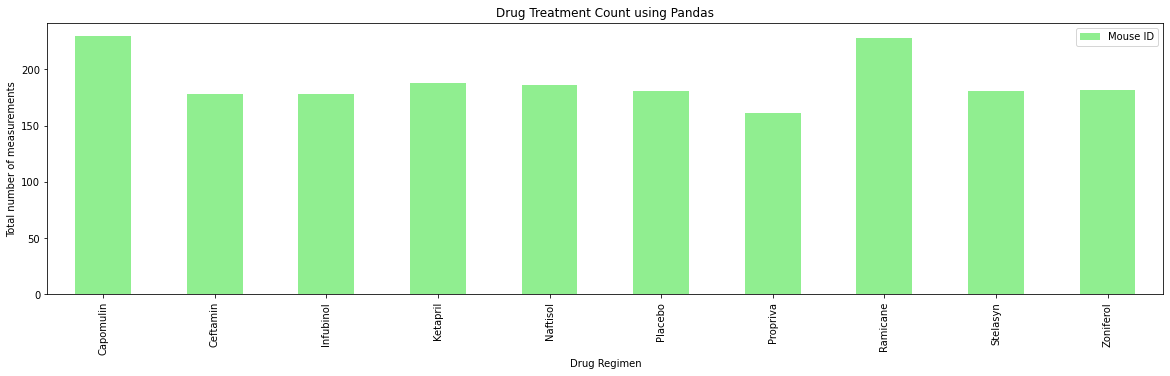

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
group_data = pd.DataFrame(merged_data.groupby(['Drug Regimen']).count())
group_data = group_data.drop(columns = ['Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Metastatic Sites'])
group_data.plot(kind="bar", figsize=(20,5), color = 'lightgreen')
plt.title('Drug Treatment Count using Pandas')
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of measurements')
plt.savefig("../Images/TotalMeasurementsPandas.png")
plt.show()
plt.tight_layout()


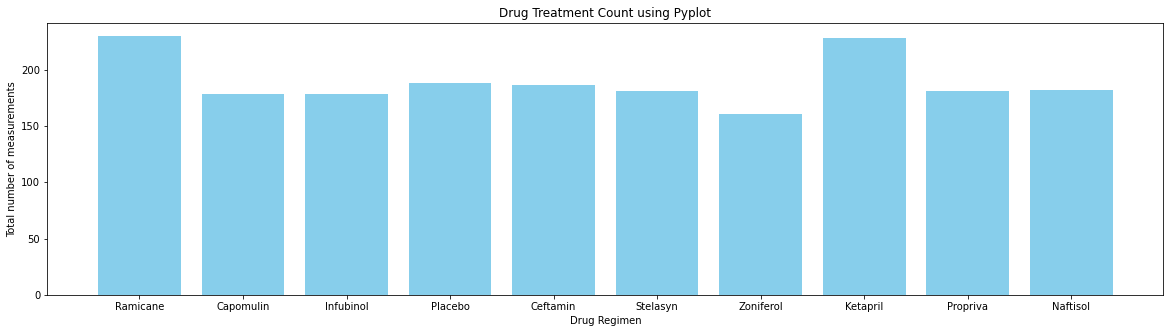

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
merged_data.head()
x_axis = merged_data['Drug Regimen'].unique()
group_measurements_count = merged_data.groupby(['Drug Regimen']).count()
total_measurements = group_measurements_count['Mouse ID']
plt.bar(x_axis,total_measurements, color="skyblue", align="center")
plt.rcParams['figure.figsize'] = (20,5)
plt.title('Drug Treatment Count using Pyplot')
plt.xlabel('Drug Regimen')
plt.ylabel('Total number of measurements')
plt.savefig("../Images/TotalMeasurementsPyplot.png")

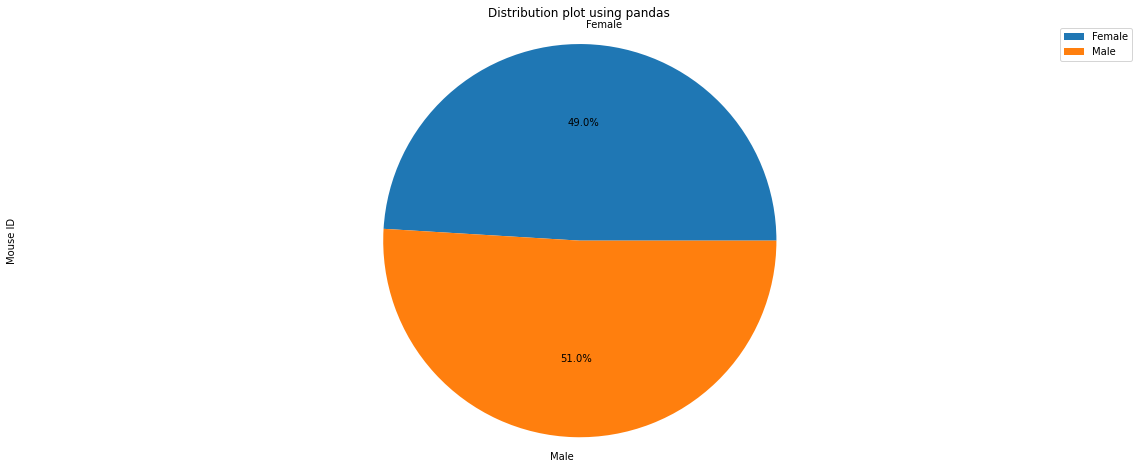

<Figure size 1440x360 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data_clean_df
gender_df = pd.DataFrame(data_clean_df.groupby(['Sex']).count()).reset_index()
gender_df.head()
gender_df = gender_df[['Sex','Mouse ID']]

gender_df.plot(kind='pie', y = 'Mouse ID', autopct='%1.1f%%',figsize = (20,8), labels=gender_df['Sex'], 
               title=('Distribution plot using pandas'))

plt.axis('equal')
plt.show()
plt.savefig("../Images/Piechartusingpandas.png")

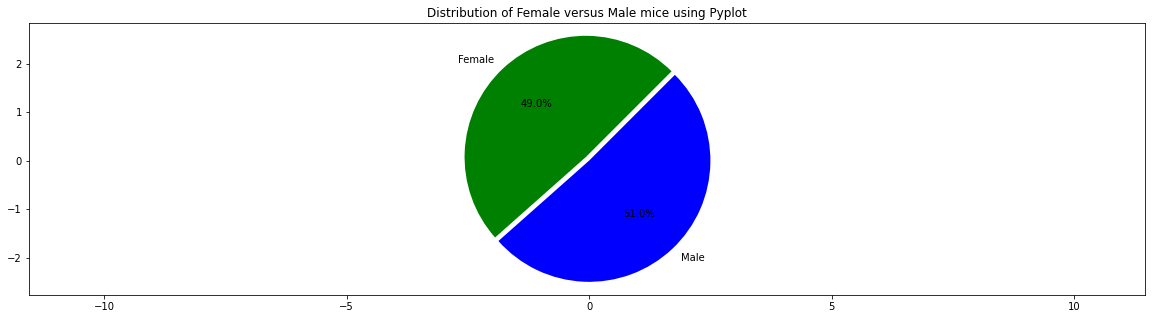

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_mice = (data_clean_df.groupby(['Sex'])['Mouse ID'].count()).tolist()
gender_mice
labels = ['Female', 'Male']
colors = ['green', 'blue']
explode = (0.1, 0)
plt.pie(gender_mice, explode=explode, labels=labels, colors=colors, 
        radius=2.5, frame=True, autopct='%1.1f%%', startangle = 45)
plt.axis('equal')
plt.title('Distribution of Female versus Male mice using Pyplot')
plt.savefig("../Images/PiechartusingPyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
tumor_df = data_clean_df.groupby('Mouse ID').max().Timepoint.reset_index()\
    .merge(data_clean_df, on =['Mouse ID', 'Timepoint'])

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_list = []

for drug in drugs:
    drug_df = tumor_df[tumor_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    iqr = drug_df.quantile(.75) - drug_df.quantile(.25)
    low = drug_df.quantile(.25) - 1.5*iqr
    upper = drug_df.quantile(.75) + 1.5*iqr
    print(f'potential outliers for {drug}: {drug_df[(drug_df>upper) | (drug_df<low)]}')
    drug_list.append(drug_df)

potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


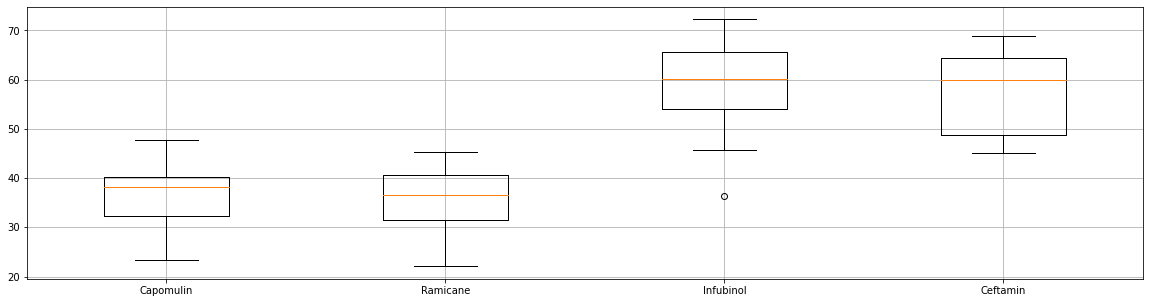

<Figure size 1440x360 with 0 Axes>

In [15]:
plt.boxplot(drug_list, labels=drugs)
plt.grid()
plt.show()
plt.savefig("../Images/Boxplots.png")

In [16]:
four_regimens_df = tumor_df.loc[ (tumor_df['Drug Regimen']=='Capomulin')|
                                    (tumor_df['Drug Regimen']=='Ramicane')|
                                    (tumor_df['Drug Regimen']=='Infubinol')|
                                    (tumor_df['Drug Regimen']=='Ceftamin'),:]
four_regimens_df                                   
# four_regimens_df has 100 rows, 25 each

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [17]:
# Locate the rows which contain mice on each drug and get the tumor volumes
four_regimens_df['Drug Regimen'].value_counts()
capomulin_data = four_regimens_df.loc[(four_regimens_df['Drug Regimen']=='Capomulin'),'Tumor Volume (mm3)']
ramicane_data = four_regimens_df.loc[(four_regimens_df['Drug Regimen']=='Ramicane'),'Tumor Volume (mm3)']
infubinol_data = four_regimens_df.loc[(four_regimens_df['Drug Regimen']=='Infubinol'),'Tumor Volume (mm3)']
ceftamin_data = four_regimens_df.loc[(four_regimens_df['Drug Regimen']=='Ceftamin'),'Tumor Volume (mm3)']

In [18]:
# Put treatments into a lists
treatments =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create lists to fill with tumor vol data (for plotting)
capomulin = list(capomulin_data)
ramicane = list(ramicane_data)
infubinol = list(infubinol_data)
ceftamin = list(ceftamin_data)

In [19]:
#Calculations and Boxplot for Capomulin treatment data
#Calculate the IQR and quantitatively determine if there are any potential outliers 
quartiles = capomulin_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Capomulin treatement is: {lowerq}")
print(f"The upper quartile of Capomulin treatement is: {upperq}")
print(f"The interquartile range of Capomulin treatement is: {iqr}")
print(f"The the median of Capomulin treatement is: {quartiles[0.5]} ")
 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin treatement is: 32.37735684
The upper quartile of Capomulin treatement is: 40.1592203
The interquartile range of Capomulin treatement is: 7.781863460000004
The the median of Capomulin treatement is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
#Calculations and Boxplot for Ramicane treatment data
# Calculate the IQR and quantitatively determine if there are any potential outliers 
quartiles = ramicane_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ramicane treatement is: {lowerq}")
print(f"The upper quartile of Ramicane treatement is: {upperq}")
print(f"The interquartile range of Ramicane treatement is: {iqr}")
print(f"The the median of Ramicane treatement is: {quartiles[0.5]} ")
 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane treatement is: 31.56046955
The upper quartile of Ramicane treatement is: 40.65900627
The interquartile range of Ramicane treatement is: 9.098536719999998
The the median of Ramicane treatement is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [21]:
#Calculations and Boxplot for Infubinol treatment data
# Calculate the IQR and quantitatively determine if there are any potential outliers 
quartiles = infubinol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Infubinol treatement is: {lowerq}")
print(f"The upper quartile of Infubinol treatement is: {upperq}")
print(f"The interquartile range of Infubinol treatement is: {iqr}")
print(f"The the median of Infubinol treatement is: {quartiles[0.5]} ")
 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Infubinol treatement is: 54.04860769
The upper quartile of Infubinol treatement is: 65.52574285
The interquartile range of Infubinol treatement is: 11.477135160000003
The the median of Infubinol treatement is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [22]:
#Calculations and Boxplot for Ceftamin treatment data
# Calculate the IQR and quantitatively determine if there are any potential outliers 
quartiles = ceftamin_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ceftamin treatement is: {lowerq}")
print(f"The upper quartile of Ceftamin treatement is: {upperq}")
print(f"The interquartile range of Ceftamin treatement is: {iqr}")
print(f"The the median of Ceftamin treatement is: {quartiles[0.5]} ")
 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ceftamin treatement is: 48.72207785
The upper quartile of Ceftamin treatement is: 64.29983003
The interquartile range of Ceftamin treatement is: 15.577752179999997
The the median of Ceftamin treatement is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


## Line and Scatter Plots

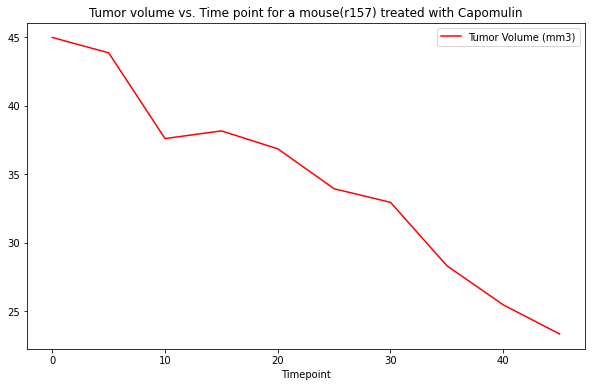

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_plot = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']
#capomulin_lineplot --reference mouse for plot selected: s185    
mouse_id = capomulin_plot.loc[capomulin_plot['Mouse ID'] == 's185']
mouse_id = mouse_id.loc[:, ['Timepoint', 'Tumor Volume (mm3)']].reset_index(drop=True)
x_axis = mouse_id['Timepoint']
y_label = mouse_id['Tumor Volume (mm3)']
mouse_id.set_index('Timepoint').plot(figsize=(10,6),
                    title = 'Tumor volume vs. Time point for a mouse(r157) treated with Capomulin', color="red")
plt.savefig("../Images/Line_plot_Capomulin.png")

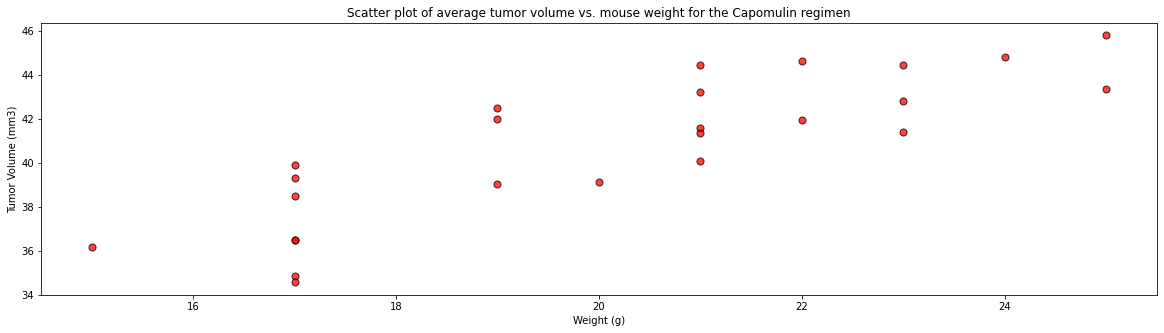

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_plot.head()
#Extracting the mouse data from the Capomulin regimen dataframe.
mouse_data = capomulin_plot.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]

# Get the average tumor volume for each mouse under the use of Capomulin
average = pd.DataFrame(mouse_data.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()).reset_index()
x_axis = average['Weight (g)']
volume =  average['Tumor Volume (mm3)']
plt.scatter(x_axis,volume,marker ='o', facecolors = 'red',edgecolors = 'black', s=50,alpha=0.75)
plt.title('Scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig("../Images/Scatterplot.png")

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between both factors is 0.84


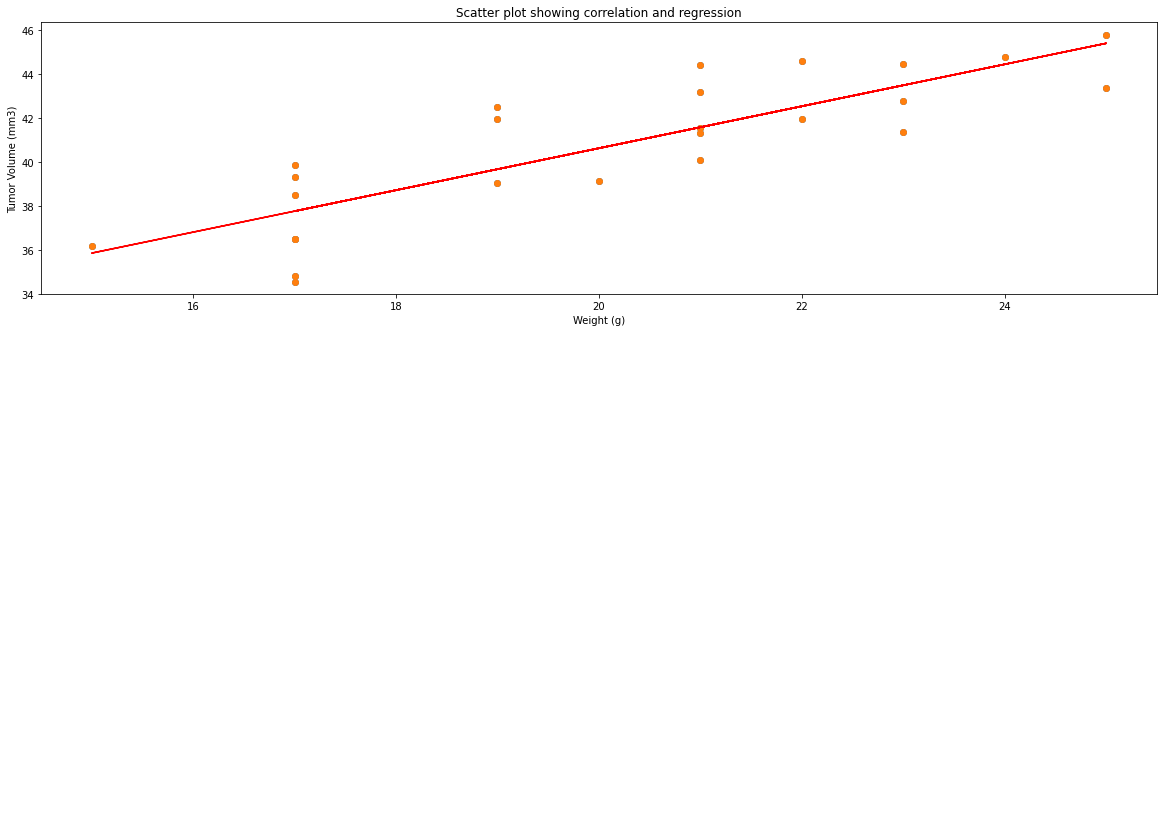

In [26]:
from scipy.stats import linregress
correlation = st.pearsonr(x_axis,volume)
plt.scatter(x_axis,volume)
plt.title('Scatter plot showing correlation and regression')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, volume)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_axis, volume)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=20,color='red')
print(f'The correlation between both factors is {round(correlation[0],2)}')